In [1]:
knitr::opts_chunk$set(echo = TRUE,
                      message = FALSE,
                      warning = FALSE)


This file shows the code to reproduce similar maps and charts as those included in the following Statistics Explained article <https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Regional_household_income_statistics>.



In [2]:
library(restatapi)
library(giscoR)
library(tidyverse)
library(sf)
library(tmap)
library(plotly)
library(hrbrthemes)
library(Hmisc)


restatapi: - config file with the API version 1 loaded from GitHub (the 'current' API version number is 1).
           - 4 from the 8 cores are used for parallel computing, can be changed with 'options(restatapi_cores=...)'
           - 'auto' method will be used for file download, can be changed with 'options(restatapi_dmethod=...)'
           - the Table of contents (TOC) was not pre-loaded into the deafult cache ('.restatapi_env').

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is 

In [3]:
hh2 <- get_eurostat_data("nama_10r_2hhinc")
gdp2 <- get_eurostat_data("nama_10r_2gdp")
pop3 <- get_eurostat_data("nama_10r_3popgdp")
map <- gisco_get_nuts(
  resolution = "60",
  nuts_level = "2",
  year = "2016"
)

### Map 1: Household primary income per capita as % EU27 average in 2018



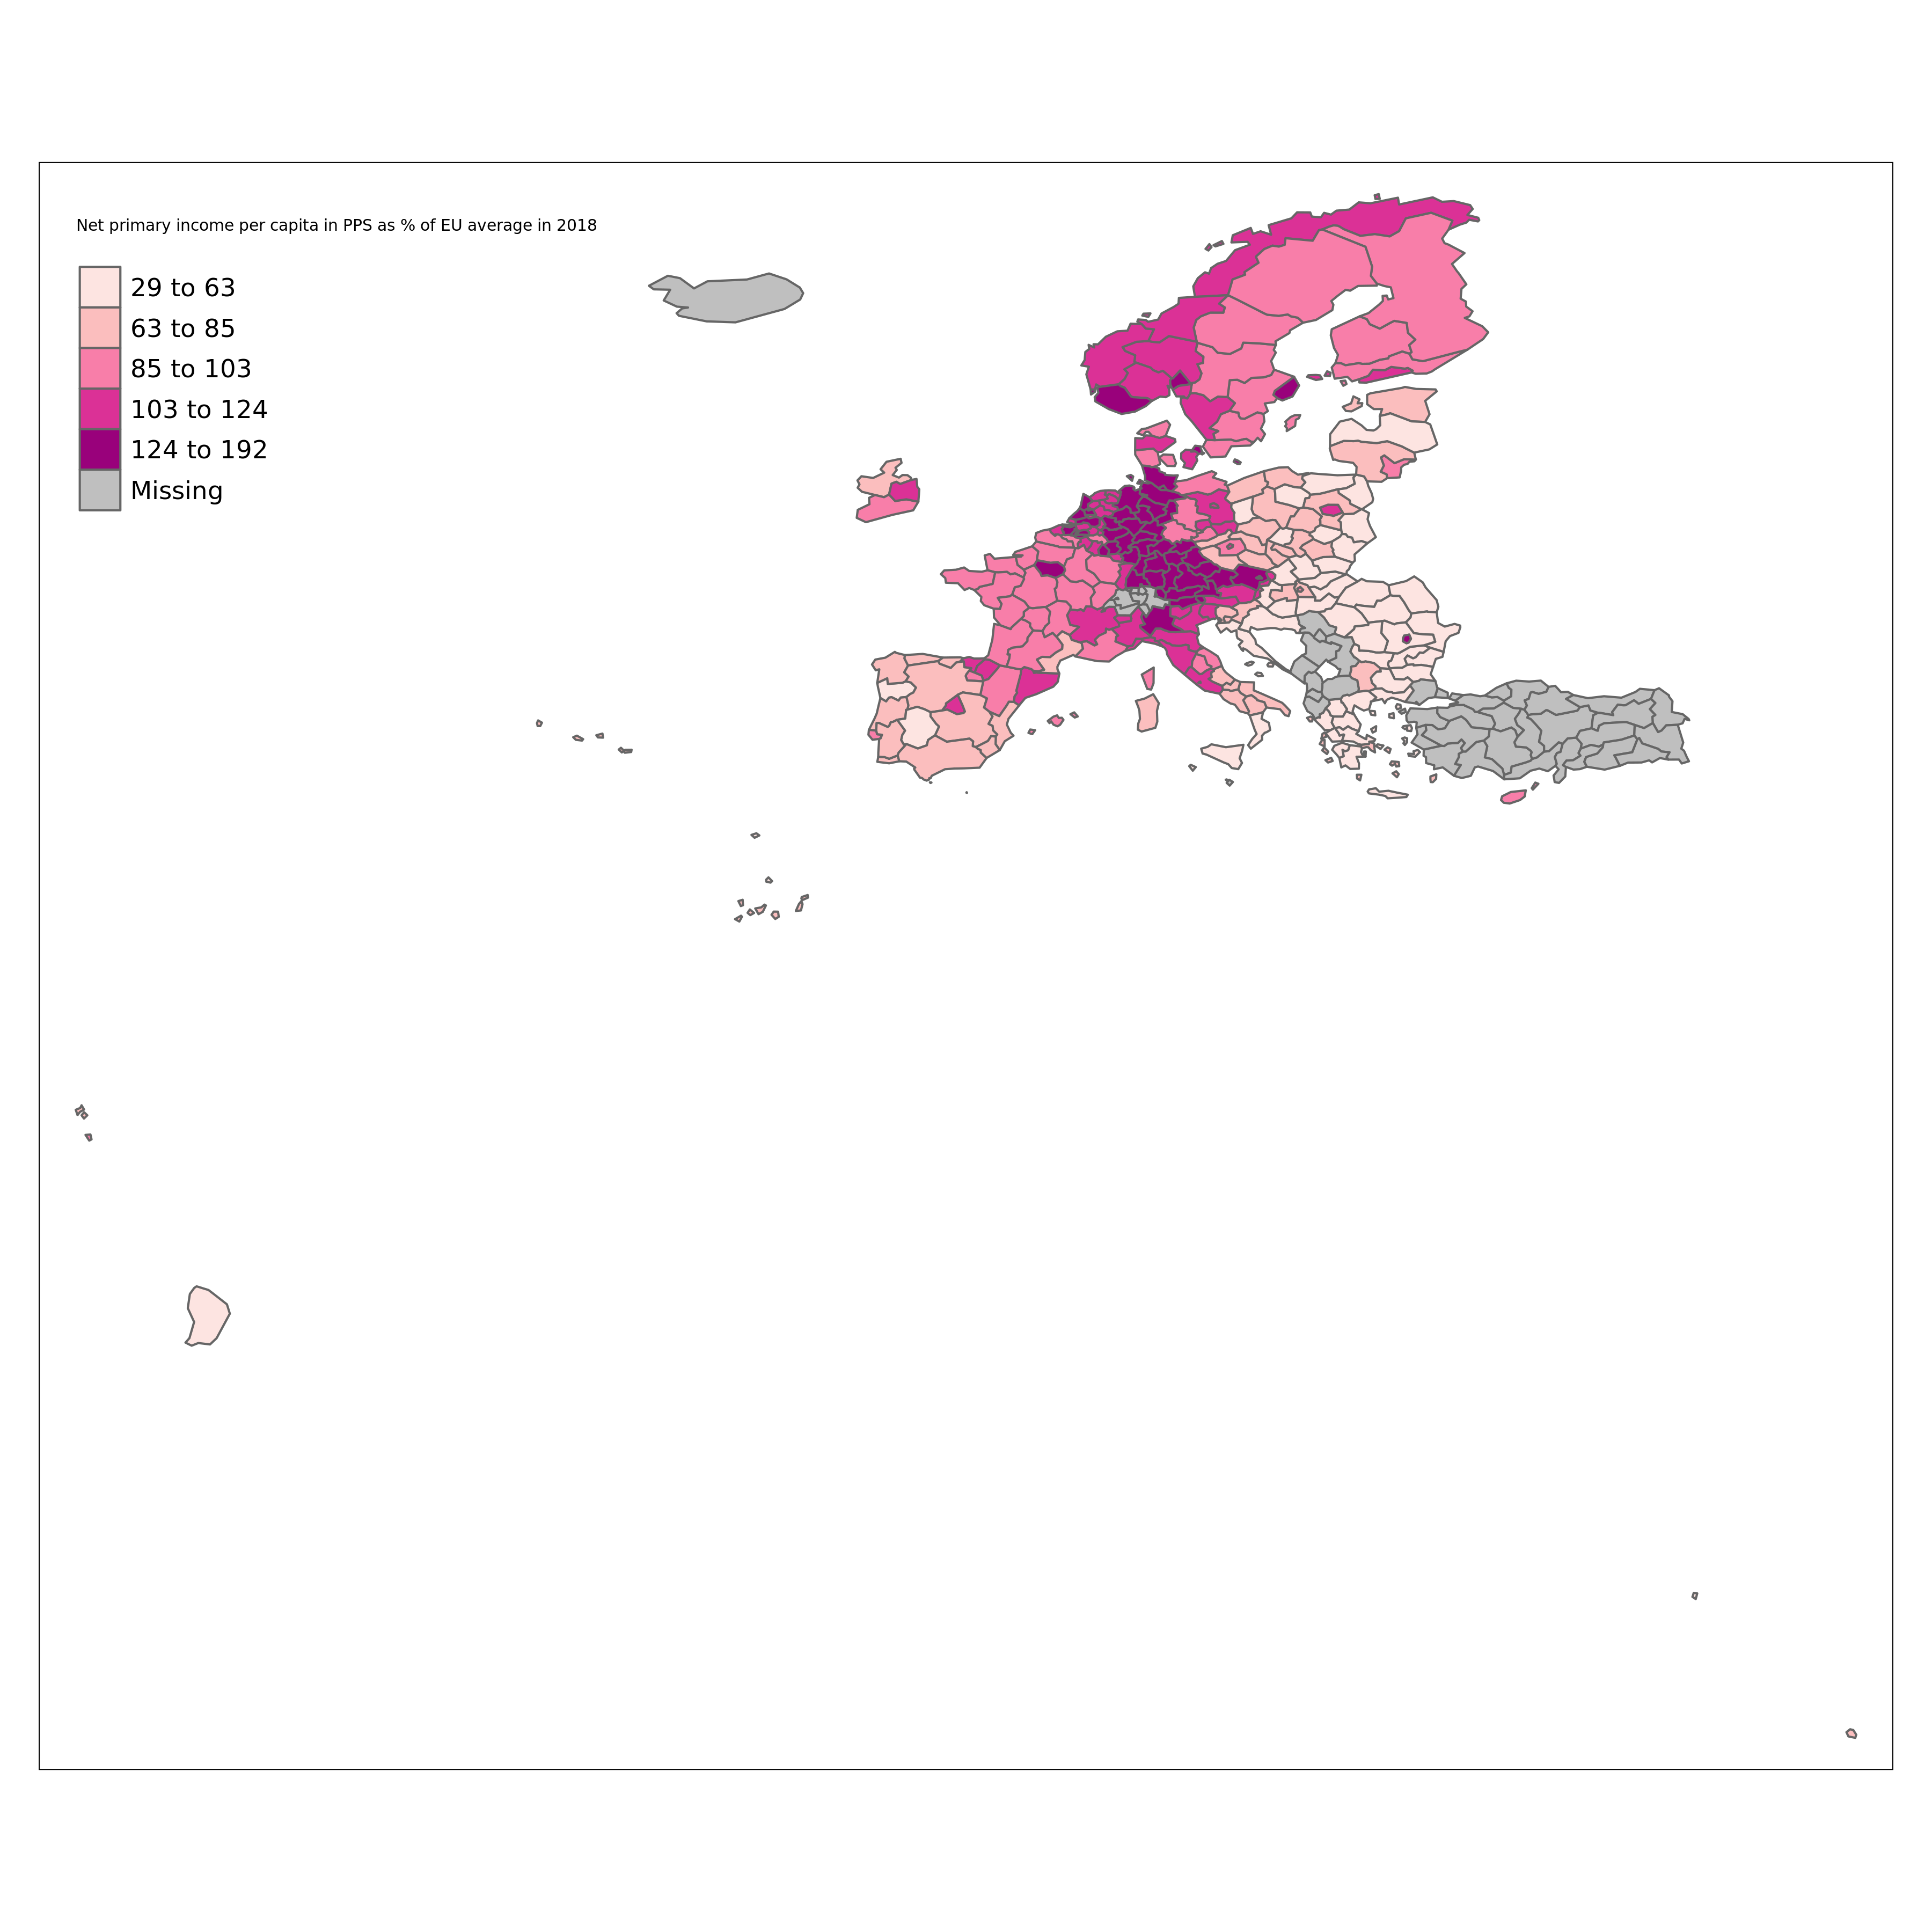

In [4]:
temp <- hh2 %>%
  filter(time == 2018 & na_item == "B5N" & unit == "PPS_EU27_2020_HAB") %>%
  select(geo, values) %>%
  rename(b5n = "values") %>%
  mutate(eu_index = round(b5n * 100 / b5n[geo == "EU27_2020"], 1))

sf <- left_join(map, temp,by=c("NUTS_ID"="geo"))

options(repr.plot.width=9, repr.plot.height=9,repr.plot.res=400)
# tmap_mode("view")
sf %>%
  filter(CNTR_CODE != "UK") %>%
  tm_shape() +
  tm_fill("eu_index",
    popup.vars = c("eu_index", "NUTS_ID", "NUTS_NAME"),
    palette = "RdPu", # similar to Economy and Finance
    breaks = c(29, 63, 85, 103, 124, 192),
    title = "Net primary income per capita in PPS as % of EU average in 2018 "
  ) +
  tm_borders()


### Map 2: Household primary income as % of GDP, 2018



Joining, by = "geo"



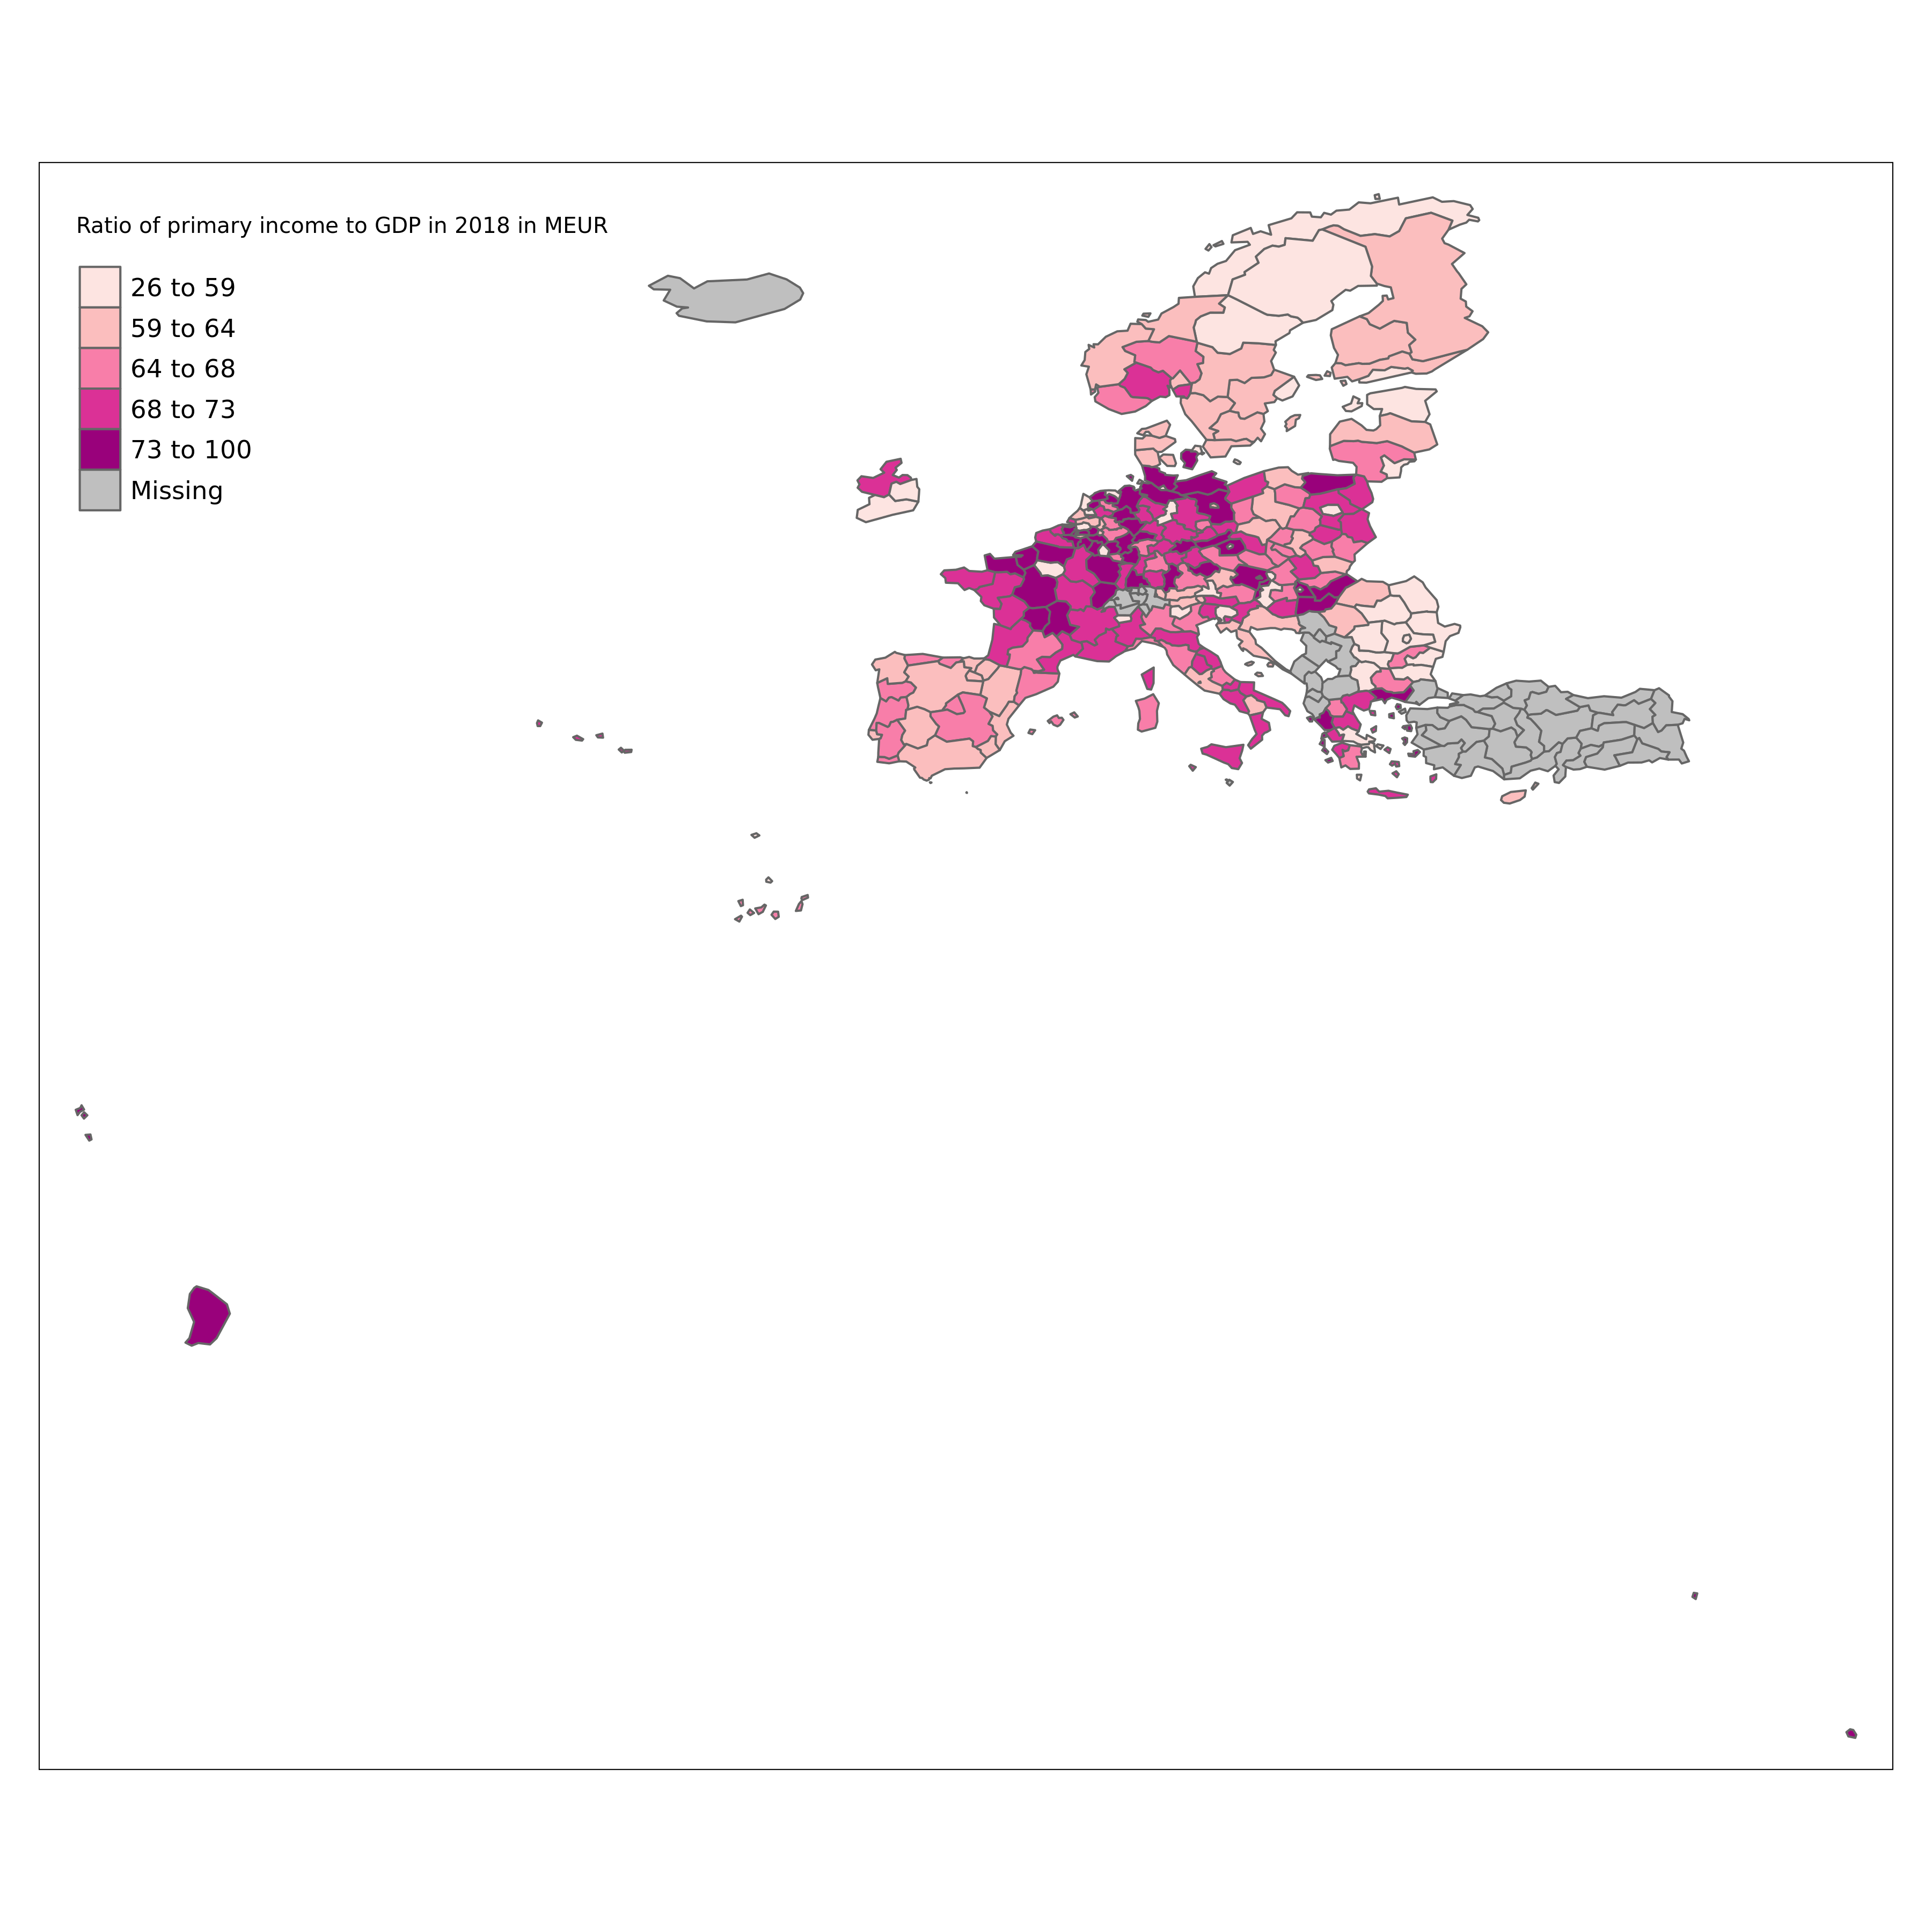

In [5]:
hh2w <- hh2 %>%
  filter(time == 2018 & na_item == "B5N" & unit == "MIO_EUR") %>%
  select(geo, values) %>%
  rename(b5n = "values")

gdp2w <- gdp2 %>%
  filter(time == 2018 & unit == "MIO_EUR") %>%
  select(geo, values) %>%
  rename(gdp = "values")

temp <- full_join(hh2w, gdp2w) %>%
  mutate(b5n_gdp = round(b5n * 100 / gdp, digits = 1))

sf <- left_join(map, temp,by=c("NUTS_ID"="geo"))

# tmap_mode("view")
sf %>%
  filter(CNTR_CODE != "UK") %>%
  tm_shape() +
  tm_fill("b5n_gdp",
    popup.vars = c("b5n_gdp", "NUTS_ID", "NUTS_NAME"),
    palette = "RdPu",
    breaks =c(26, 59, 64, 68, 73, 100),
    title = "Ratio of primary income to GDP in 2018 in MEUR"
  ) +
  tm_borders()


### Chart 1: Components of primary income



<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgY2hhcnNldD0idXRmLTgiIC8+Cjx0aXRsZT5wbG90bHk8L3RpdGxlPgo8c2NyaXB0IHNyYz0iZGF0YTphcHBsaWNhdGlvbi9qYXZhc2NyaXB0O2Jhc2U2NCxLR1oxYm1OMGFXOXVLQ2tnZXdvZ0lDOHZJRWxtSUhkcGJtUnZkeTVJVkUxTVYybGtaMlYwY3lCcGN5QmhiSEpsWVdSNUlHUmxabWx1WldRc0lIUm9aVzRnZFhObElHbDBPeUJ2ZEdobGNuZHBjMlVnWTNKbFlYUmxJR0VLSUNBdkx5QnVaWGNnYjJKcVpXTjBMaUJVYUdseklHRnNiRzkzY3lCd2NtVmpaV1JwYm1jZ1kyOWtaU0IwYnlCelpYUWdiM0IwYVc5dWN5QjBhR0YwSUdGbVptVmpkQ0IwYUdVS0lDQXZMeUJwYm1sMGFXRnNhWHBoZEdsdmJpQndjbTlqWlhOeklDaDBhRzkxWjJnZ2JtOXVaU0JqZFhKeVpXNTBiSGtnWlhocGMzUXBMZ29nSUhkcGJtUnZkeTVJVkUxTVYybGtaMlYwY3lBOUlIZHBibVJ2ZHk1SVZFMU1WMmxrWjJWMGN5QjhmQ0I3ZlRzS0NpQWdMeThnVTJWbElHbG1JSGRsSjNKbElISjFibTVwYm1jZ2FXNGdZU0IyYVdWM1pYSWdjR0Z1WlM0Z1NXWWdibTkwTENCM1pTZHlaU0JwYmlCaElIZGxZaUJpY205M2MyVnlMZ29nSUhaaGNpQjJhV1YzWlhKTmIyUmxJRDBnZDJsdVpHOTNMa2hVVFV4WGFXUm5aWFJ6TG5acFpYZGxjazF2WkdVZ1BRb2dJQ0FnSUNBdlhHSjJhV1YzWlhKZmNHRnVaVDB4WEdJdkxuUmxjM1FvZDJsdVpHOTNMbXh2WTJGMGFXOXVLVHNLQ2lBZ0x5OGdVMlZsSUdsbUlIZGxKM0psSUhKMWJtNXBibWNnYVc0Z1UyaHBibmtnYlc5a1pTNGdTV1lnYm05MExDQnBkQ2R6SUdFZ2MzUmhkR2xqSUdSdlkzVnRaVzUwTGdvZ0lDOHZJRTV2ZEdVZ2RHaGhkQ0J6ZEdGMGFXTWdkMmxrWjJWMGN5QmpZVzRnWVhCd1pXRnlJR2x1SUdKdmRHZ2dVMmhwYm5rZ1lXNWtJSE4wWVhScFl5QnRiMlJsY3l3Z1luVjBDaUFnTHk4Z2IySjJhVzkxYzJ4NUxDQlRhR2x1ZVNCM2FXUm5aWFJ6SUdOaGJpQnZibXg1SUdGd2NHVmhjaUJwYmlCVGFHbHVlU0JoY0hCekwyUnZZM1Z0Wlc1MGN5NEtJQ0IyWVhJZ2MyaHBibmxOYjJSbElEMGdkMmx1Wkc5M0xraFVUVXhYYVdSblpYUnpMbk5vYVc1NVRXOWtaU0E5Q2lBZ0lDQWdJSFI1Y0dWdlppaDNhVzVrYjNjdVUyaHBibmtwSUNFOVBTQWlkVzVrWldacGJtVmtJaUFtSmlBaElYZHBibVJ2ZHk1VGFHbHVlUzV2ZFhSd2RYUkNhVzVrYVc1bmN6c0tDaUFnTHk4Z1YyVWdZMkZ1SjNRZ1kyOTFiblFnYjI0Z2FsRjFaWEo1SUdKbGFXNW5JR0YyWVdsc1lXSnNaU3dnYzI4Z2QyVWdhVzF3YkdWdFpXNTBJRzkxY2lCdmQyNEtJQ0F2THlCMlpYSnphVzl1SUdsbUlHNWxZMlZ6YzJGeWVTNEtJQ0JtZFc1amRHbHZiaUJ4ZFdWeWVWTmxiR1ZqZEc5eVFXeHNLSE5qYjNCbExDQnpaV3hsWTNSdmNpa2dld29nSUNBZ2FXWWdLSFI1Y0dWdlppaHFVWFZsY25rcElDRTlQU0FpZFc1a1pXWnBibVZrSWlBbUppQnpZMjl3WlNCcGJuTjBZVzVqWlc5bUlHcFJkV1Z5ZVNrZ2V3b2dJQ0FnSUNCeVpYUjFjbTRnYzJOdmNHVXVabWx1WkNoelpXeGxZM1J2Y2lrN0NpQWdJQ0I5Q2lBZ0lDQnBaaUFvYzJOdmNHVXVjWFZsY25sVFpXeGxZM1J2Y2tGc2JDa2dld29nSUNBZ0lDQnlaWFIxY200Z2MyTnZjR1V1Y1hWbGNubFRaV3hsWTNSdmNrRnNiQ2h6Wld4bFkzUnZjaWs3Q2lBZ0lDQjlDaUFnZlFvS0lDQm1kVzVqZEdsdmJpQmhjMEZ5Y21GNUtIWmhiSFZsS1NCN0NpQWdJQ0JwWmlBb2RtRnNkV1VnUFQwOUlHNTFiR3dwQ2lBZ0lDQWdJSEpsZEhWeWJpQmJYVHNLSUNBZ0lHbG1JQ2drTG1selFYSnlZWGtvZG1Gc2RXVXBLUW9nSUNBZ0lDQnlaWFIxY200Z2RtRnNkV1U3Q2lBZ0lDQnlaWFIxY200Z1czWmhiSFZsWFRzS0lDQjlDZ29nSUM4dklFbHRjR3hsYldWdWRDQnFVWFZsY25rbmN5QmxlSFJsYm1RS0lDQm1kVzVqZEdsdmJpQmxlSFJsYm1Rb2RHRnlaMlYwSUM4cUxDQXVMaTRnS2k4cElIc0tJQ0FnSUdsbUlDaGhjbWQxYldWdWRITXViR1Z1WjNSb0lEMDlJREVwSUhzS0lDQWdJQ0FnY21WMGRYSnVJSFJoY21kbGREc0tJQ0FnSUgwS0lDQWdJR1p2Y2lBb2RtRnlJR2tnUFNBeE95QnBJRHdnWVhKbmRXMWxiblJ6TG14bGJtZDBhRHNnYVNzcktTQjdDaUFnSUNBZ0lIWmhjaUJ6YjNWeVkyVWdQU0JoY21kMWJXVnVkSE5iYVYwN0NpQWdJQ0FnSUdadmNpQW9kbUZ5SUhCeWIzQWdhVzRnYzI5MWNtTmxLU0I3Q2lBZ0lDQWdJQ0FnYVdZZ0tITnZkWEpqWlM1b1lYTlBkMjVRY205d1pYSjBlU2h3Y205d0tTa2dld29nSUNBZ0lDQWdJQ0FnZEdGeVoyVjBXM0J5YjNCZElEMGdjMjkxY21ObFczQnliM0JkT3dvZ0lDQWdJQ0FnSUgwS0lDQWdJQ0FnZlFvZ0lDQWdmUW9nSUNBZ2NtVjBkWEp1SUhSaGNtZGxkRHNLSUNCOUNnb2dJQzh2SUVsRk9DQmtiMlZ6YmlkMElITjFjSEJ2Y25RZ1FYSnlZWGt1Wm05eVJXRmphQzRLSUNCbWRXNWpkR2x2YmlCbWIzSkZZV05vS0haaGJIVmxjeXdnWTJGc2JHSmhZMnNzSUhSb2FYTkJjbWNwSUhzS0lDQWdJR2xtSUNoMllXeDFaWE11Wm05eVJXRmphQ2tnZXdvZ0lDQWdJQ0IyWVd4MVpYTXVabTl5UldGamFDaGpZV3hzWW1GamF5d2dkR2hwYzBGeVp5azdDaUFnSUNCOUlHVnNjMlVnZXdvZ0lDQWdJQ0JtYjNJZ0tIWmhjaUJwSUQwZ01Ec2dhU0E4SUhaaGJIVmxjeTVzWlc1bmRHZzdJR2tyS3lrZ2V3b2dJQ0FnSUNBZ0lHTmhiR3hpWVdOckxtTmhiR3dvZEdocGMwRnlaeXdnZG1Gc2RXVnpXMmxkTENCcExDQjJZV3gxWlhNcE93b2dJQ0FnSUNCOUNpQWdJQ0I5Q2lBZ2ZRb0tJQ0F2THlCU1pYQnNZV05sY3lCMGFHVWdjM0JsWTJsbWFXVmtJRzFsZEdodlpDQjNhWFJvSUhSb1pTQnlaWFIxY200Z2RtRnNkV1VnYjJZZ1puVnVZMU52ZFhKalpTNEtJQ0F2THdvZ0lDOHZJRTV2ZEdVZ2RHaGhkQ0JtZFc1alUyOTFjbU5sSUhOb2IzVnNaQ0J1YjNRZ1FrVWdkR2hsSUc1bGR5QnRaWFJvYjJRc0lHbDBJSE5vYjNWc1pDQmlaU0JoSUdaMWJtTjBhVzl1Q2lBZ0x5OGdkR2hoZENCU1JWUlZVazVUSUh

Warning message:
“Removed 21 rows containing missing values (geom_point).”


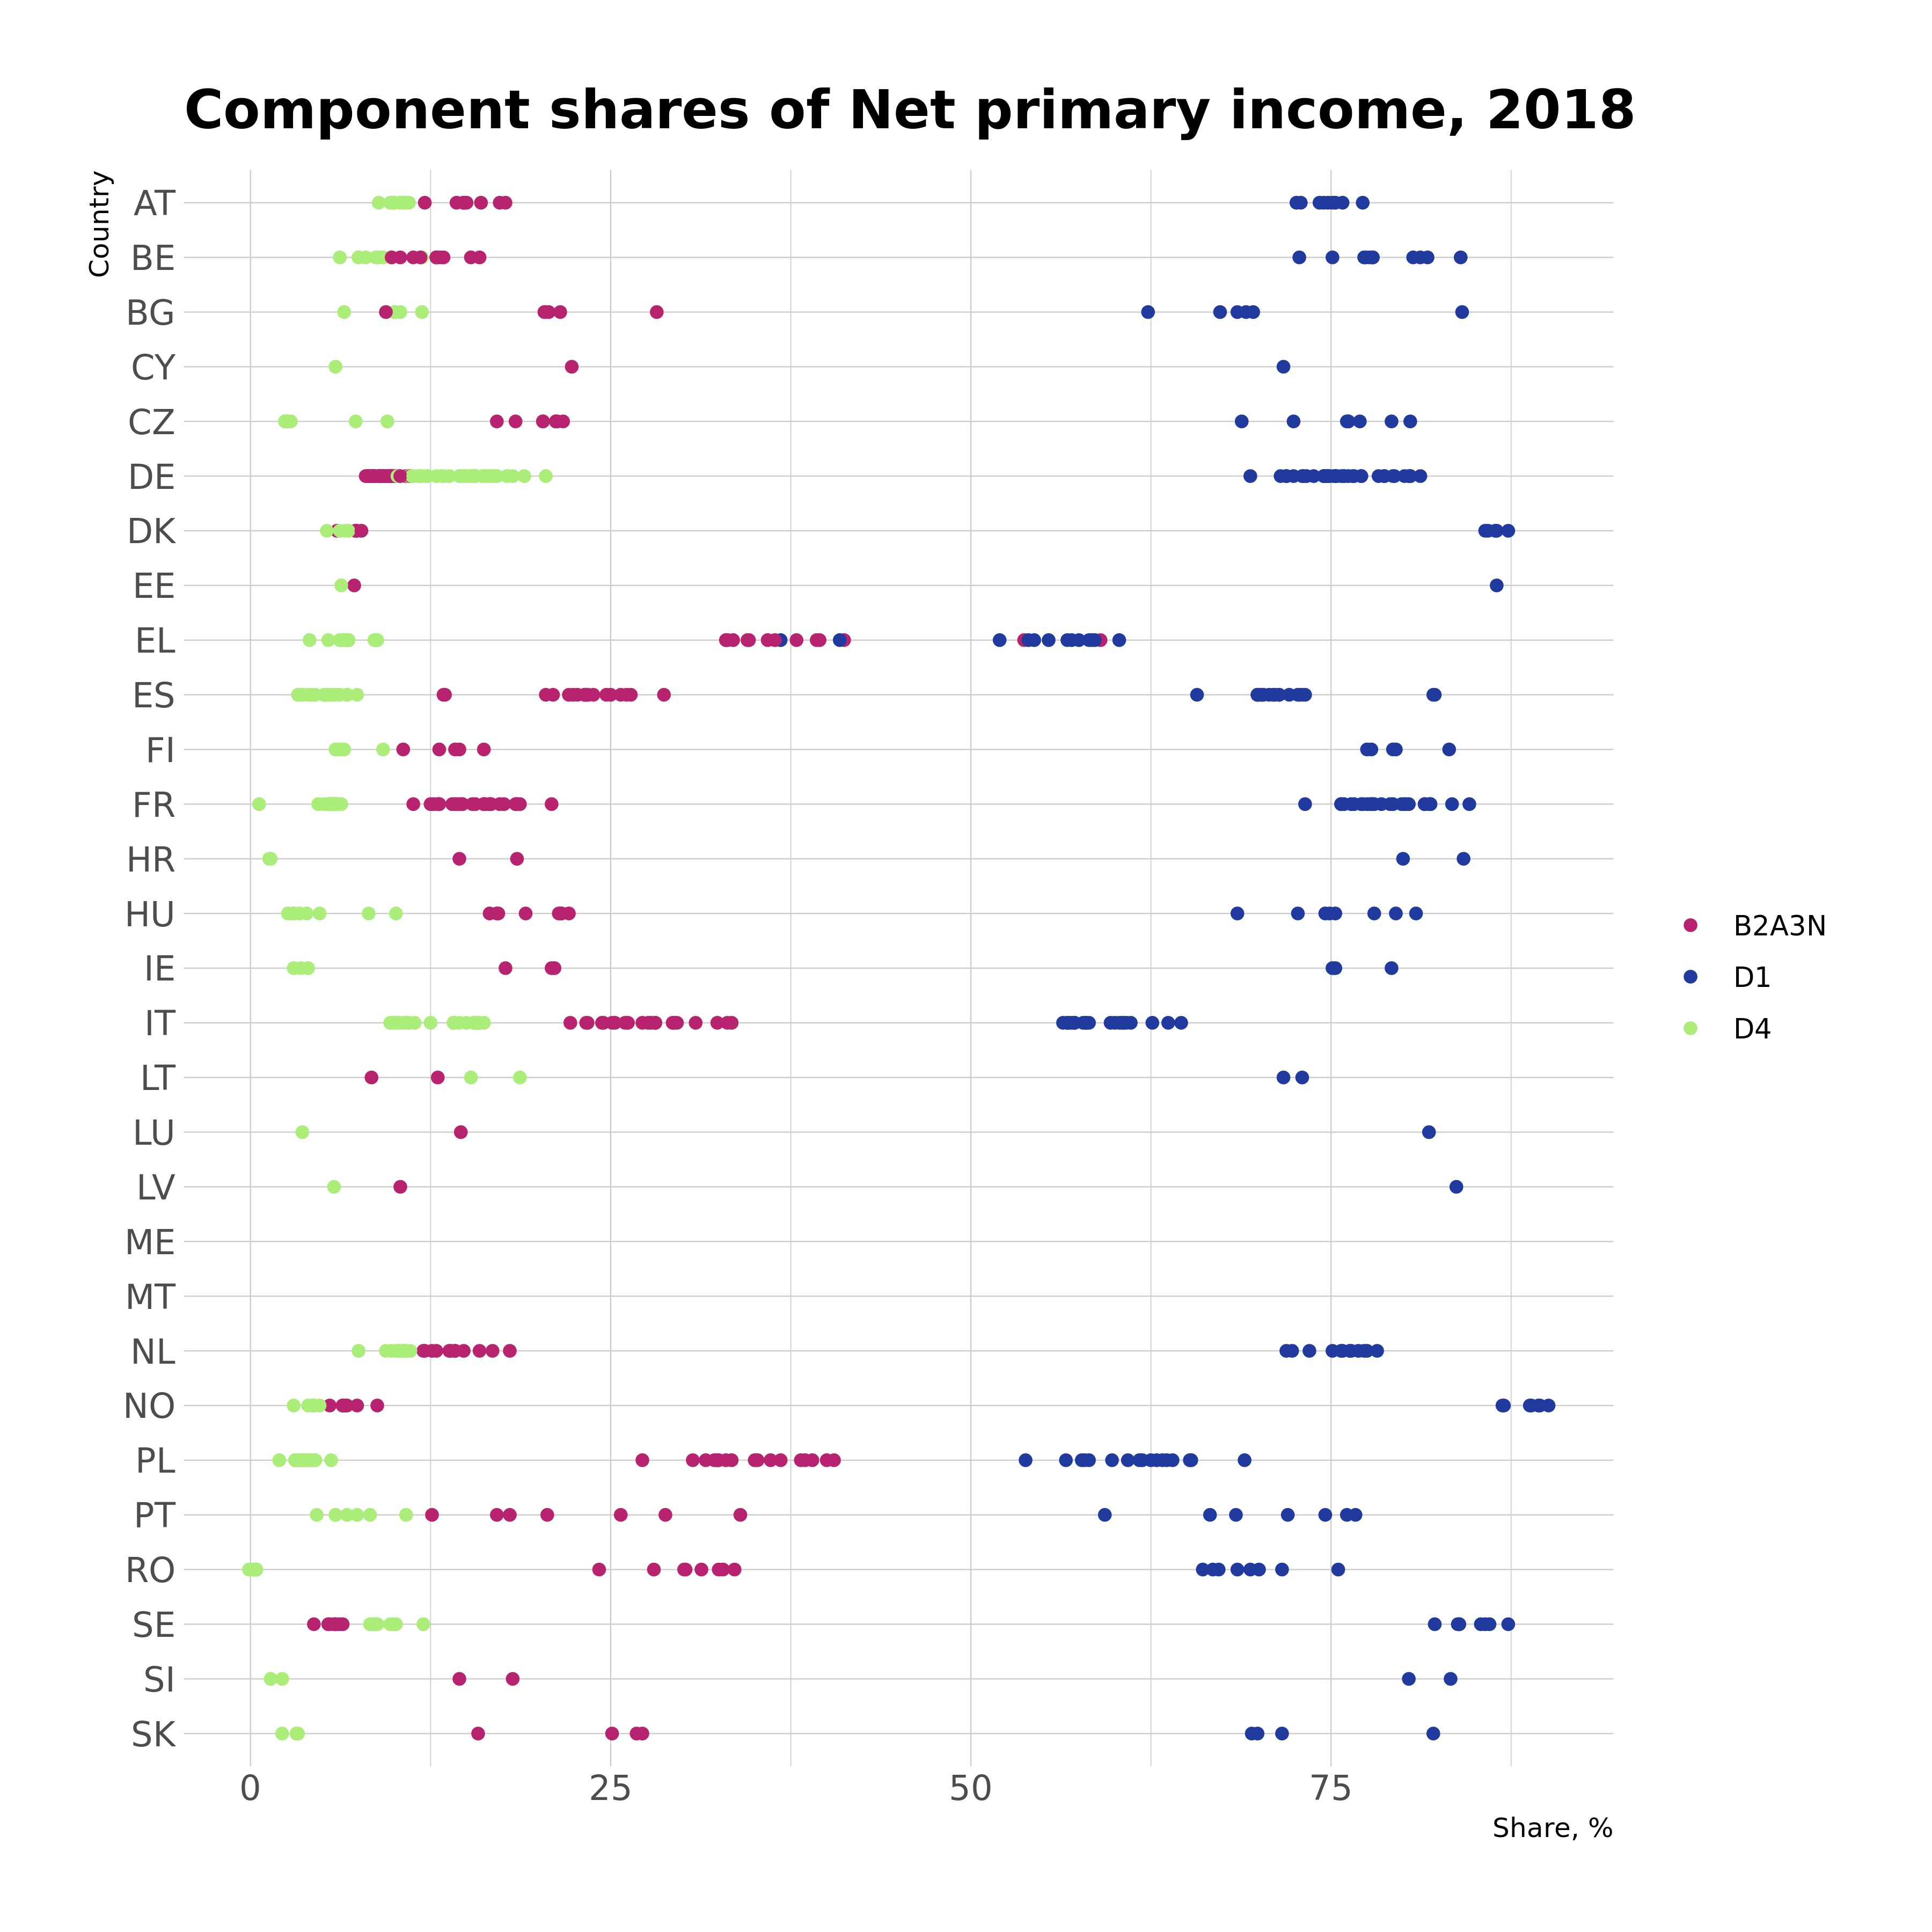

In [6]:
temp <- hh2 %>%
  unite(sto, c(direct, na_item)) %>%
  filter(time == "2018" & unit == "MIO_EUR" & !geo %in% c("ESZZ", "FRZZ")) %>%
  pivot_wider(
    names_from = sto,
    values_from = values
  ) %>%
  select(geo, BAL_B5N, RECV_D1, BAL_B2A3N, RECV_D4, PAID_D4) %>%
  mutate(BAL_D4 = RECV_D4 - PAID_D4) %>%
  select(-RECV_D4, -PAID_D4) %>%
  mutate(
    D1 = round(RECV_D1 * 100 / BAL_B5N, 1),
    B2A3N = round(BAL_B2A3N * 100 / BAL_B5N, 1),
    D4 = round(BAL_D4 * 100 / BAL_B5N, 1)
  ) %>%
  mutate(
    country = str_sub(geo, 1, 2),
    NUTS = str_length(geo) - 2
  ) %>%
  filter(NUTS == "2" & country != "UK") %>%
  select(country, geo, D1, B2A3N, D4) %>%
  pivot_longer(
    cols = c("D1", "B2A3N", "D4"),
    names_to = "Shares",
    values_to = "values"
  )

p <- ggplot(temp, aes(values, fct_rev(country), colour = Shares, label = geo)) +
  geom_point() +
  scale_colour_manual(values = c("#B82370", "#213A9E", "#ABED79")) +
  theme_ipsum_rc() +
  xlab("Share, %") +
  ylab("Country") +
  labs(title = "Component shares of Net primary income, 2018") +
  theme(legend.title = element_blank())

embed_notebook(ggplotly(p))
plot(p)

### Chart 2: Standard Deviation EU primary income



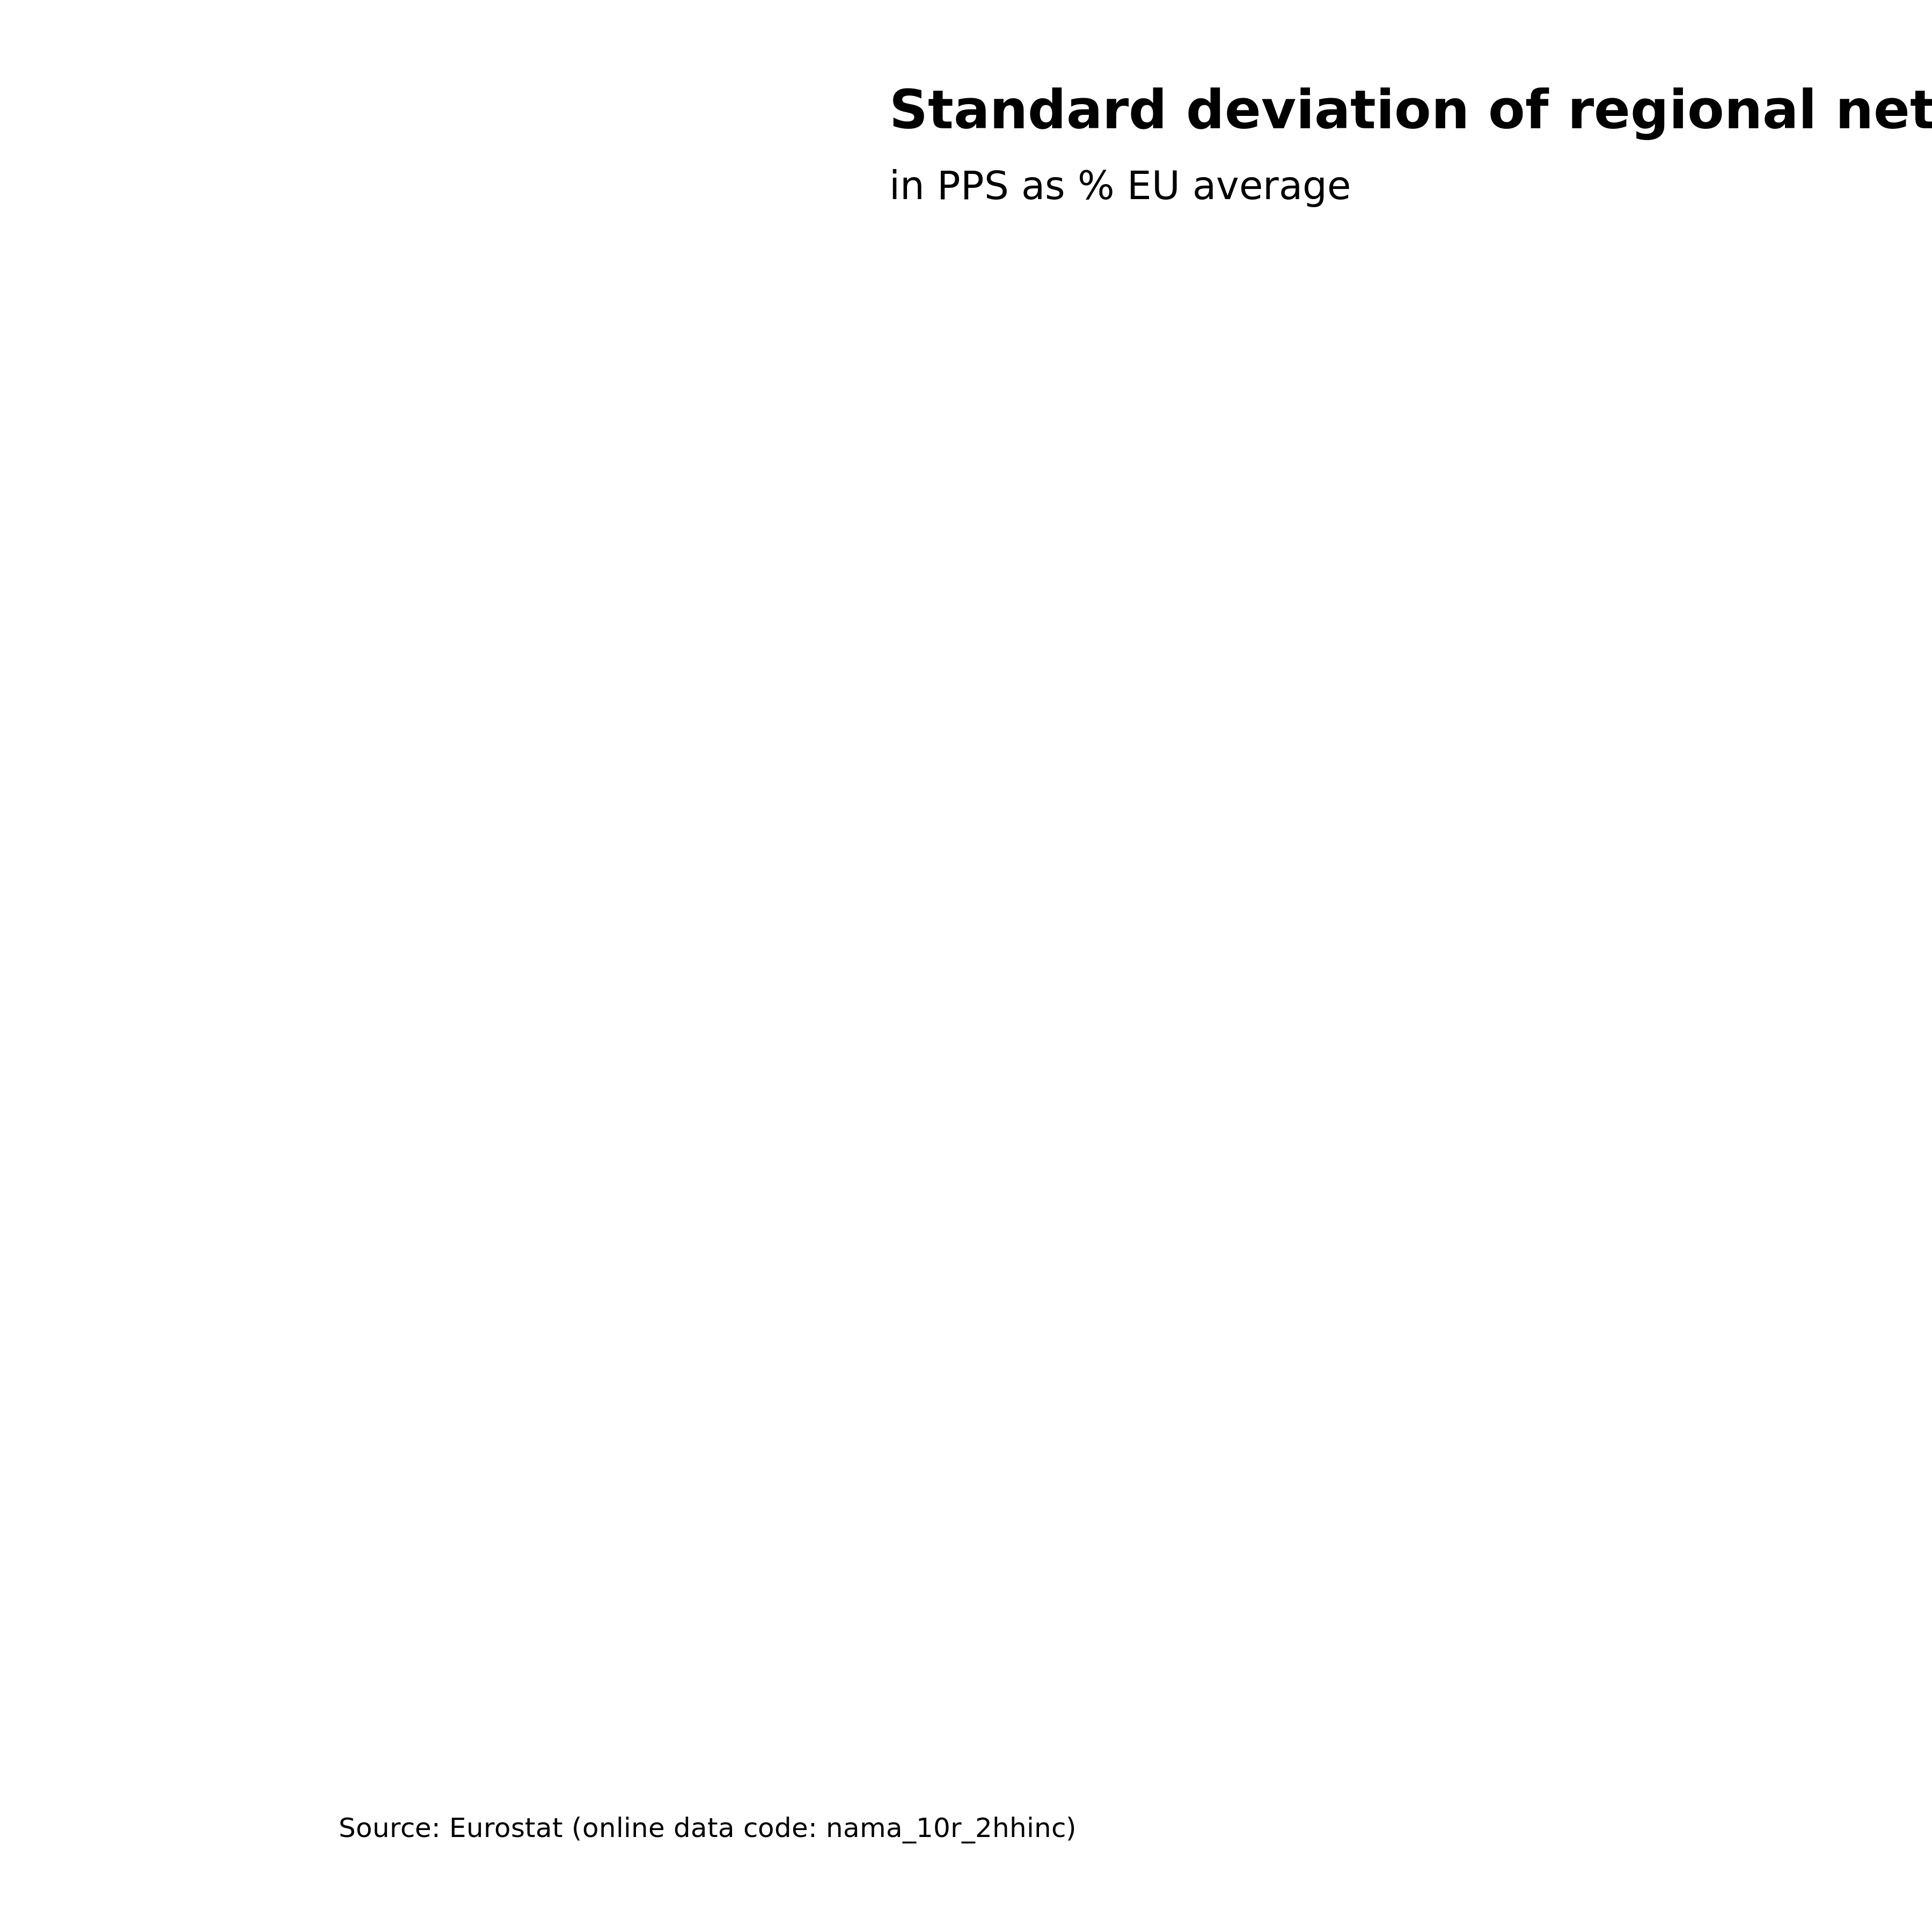

In [7]:
hh2w <- get_eurostat_data("nama_10r_2hhinc", date_filter="2000:2018",filters=list( na_item = "B5N",
    unit = "PPS_EU27_2020_HAB" ,
    geo="^(?!(ESZZ|FRZZ)).*$"),perl=TRUE,force_local_filter=T) %>%
  select(geo, time, values) %>%
  group_by(time) %>%
  mutate(
    eu_index = round(values * 100 / values[geo == "EU27_2020"], 1),
    NUTS = str_length(geo) - 2
  ) %>%
  filter(NUTS == "2")

std <- hh2w %>%
  group_by(time) %>%
  summarise(sd = sd(eu_index))
std$time<-as.numeric(std$time)

ggplot(std, aes(time, sd)) +
  geom_line(size = 1, colour = "steelblue") +
  xlab("") +
  ylab("") +
  labs(
    title = "Standard deviation of regional net primary income in PPS",
    subtitle = "in PPS as % EU average",
    caption = "Source: Eurostat (online data code: nama_10r_2hhinc)"
  ) +
  coord_fixed(ylim = c(0, 40), ratio = 0.2) +
  theme_ipsum_rc()


### Chart 3: Comparison 2010-2018



In [8]:
temp <- hh2w %>%
  filter(time %in% c("2010", "2018")) %>%
  select(-values) %>%
  pivot_wider(
    names_from = time,
    values_from = eu_index,
    names_prefix = "y"
  ) %>%
  mutate(
    country = str_sub(geo, 1, 2),
    NUTS = str_length(geo) - 2
  ) %>%
  filter(NUTS == "2" & country != "UK") %>% 
  mutate(group= case_when(
    country == "DE" ~ "DE",
    country =="FR" ~ "FR",
    country %in% c("BG", "HR", "CZ", "LT","LV", "HU", "PL", "RO", "SK") ~ "BG, HR, LV, HU, PL, RO, SK",
    country %in% c("EL", "ES", "IT", "PT") ~ "EL, ES, IT, PT",
    country %in% c("AT", "BE",  "CY", "DK", "EE", "FI", "IE", "LU", "NL", "NO", "SE", "SI") ~"Other countries"
  ))


p <- ggplot(temp, aes(y2010, y2018, colour = group, group = geo)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0) +
  xlab("2010") +
  ylab("2018") +
  theme_ipsum_rc() +
  scale_colour_ipsum()+
  theme(legend.title = element_blank())+
  ggtitle("Net primary income per capita in PPS as % EU, 2010 and 2018")

embed_notebook(ggplotly(p))
plot(p)

ERROR: Error in FUN(X[[i]], ...): object 'y2010' not found


### Chart 4: Regional differences by country



In [ ]:
temp <- hh2 %>%
  unite(na_item, c(na_item, direct)) %>%
  filter(unit == "MIO_NAC" & time == "2018" & na_item %in% c("B5N_BAL", "B6N_BAL")) %>%
  pivot_wider(
    names_from = na_item,
    values_from = values
  ) %>%
  mutate(
    country = str_sub(geo, 1, 2),
    NUTS = str_length(geo) - 2
  ) %>%
  filter(NUTS %in% c("0", "2") & country != "UK") %>%
  select(geo, country, NUTS, time, B5N_BAL, B6N_BAL) %>%
  pivot_longer(
    cols = c("B5N_BAL", "B6N_BAL"),
    names_to = "na_item",
    values_to = "values"
  )

pop <- pop3 %>%
  select(-unit) %>%
  rename(pop = values)

temp <- left_join(temp, pop) %>%
  mutate(percapita = values * 1000 / pop) %>%
  droplevels() %>%
  group_by(country, na_item) %>%
  mutate(nat_percapita = percapita * 100 / percapita[NUTS == "0"]) %>%
  filter(NUTS == "2" & !geo %in% c("ESZZ", "FRZZ") & !country %in% c("EE", "CY", "MT", "LV", "LT", "LU", "HR", "SI")) %>%
  summarise(wsd = sqrt(wtd.var(nat_percapita, pop, na.rm = TRUE))) %>%
  pivot_wider(
    names_from = na_item,
    values_from = wsd
  )

ggplot(temp) +
  geom_point(aes(B5N_BAL, reorder(country, B5N_BAL)), size = 5, colour = "#B82370") +
  geom_point(aes(B6N_BAL, reorder(country, B5N_BAL)), size = 5, colour = "#213A9E") +
  geom_segment(aes(x = B6N_BAL, xend = B5N_BAL, y = country, yend = country), size = 1.5, colour = "gray") +
  theme_ipsum_rc() +
  #  theme(panel.background = element_rect(fill = "white"))+
  xlab("") +
  ylab("") +
  ggtitle("Standard deviation of regional per capita net primary income and net disposable income",
    subtitle = "based on an index with national average = 100 and weighted by population"
  )


### Map 3: Ratio of Disposable Income to Primary Income



In [ ]:
temp <- hh2 %>%
  unite(na_item, c(na_item, direct)) %>%
  filter(unit == "MIO_NAC" & time == "2018" & na_item %in% c("B5N_BAL", "B6N_BAL")) %>%
  pivot_wider(
    names_from = na_item,
    values_from = values
  ) %>%
  mutate(
    country = str_sub(geo, 1, 2),
    NUTS = str_length(geo) - 2
  ) %>%
  filter(NUTS %in% c("0", "2") & country != "UK") %>%
  select(geo, country, NUTS, time, B5N_BAL, B6N_BAL) %>%
  pivot_longer(
    cols = c("B5N_BAL", "B6N_BAL"),
    names_to = "na_item",
    values_to = "values"
  )

pop <- pop3 %>%
  select(-unit) %>%
  rename(pop = values)

temp <- left_join(temp, pop) %>%
  mutate(percapita = values * 1000 / pop) %>%
  droplevels() %>%
  group_by(country, na_item) %>%
  mutate(nat_percapita = percapita * 100 / percapita[NUTS == "0"]) %>%
  filter(NUTS == "2" & !geo %in% c("ESZZ", "FRZZ")) %>%
  select(geo, na_item, nat_percapita) %>%
  pivot_wider(
    names_from = na_item,
    values_from = nat_percapita
  ) %>%
  mutate(ratio = round(B6N_BAL * 100 / B5N_BAL, 1))

sf <- left_join(map, temp,by=c("NUTS_ID"="geo"))


# tmap_mode("view")
sf %>%
  tm_shape() +
  tm_fill("ratio",
    popup.vars = c("ratio", "NUTS_ID", "NUTS_NAME"),
     breaks =c(78, 98, 102, 105, 107, 125),
     palette = "RdPu",
    title = "Ratio Disposable Income /Primary income"
  ) +
  tm_borders()
